In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import _tree
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('../data/data_msg_only(new tags).csv')
x = data.drop(columns=['label'])
y = data['label']

In [3]:
features_names = ['characters_count', 'and_or_count',  'blank_line', 'capital_start', 'end_dot', 'imperative_start', 'wrap_to_72',
                  'verb_direct_obj']

In [8]:
clf = DecisionTreeClassifier()
clf.fit(x, y)
rules = export_text(clf, feature_names=features_names)
print(rules)

|--- verb_direct_obj <= 0.50
|   |--- imperative_start <= 0.50
|   |   |--- characters_count <= 39.50
|   |   |   |--- characters_count <= 28.50
|   |   |   |   |--- characters_count <= 16.50
|   |   |   |   |   |--- characters_count <= 12.50
|   |   |   |   |   |   |--- class: bad
|   |   |   |   |   |--- characters_count >  12.50
|   |   |   |   |   |   |--- characters_count <= 14.50
|   |   |   |   |   |   |   |--- class: neutral
|   |   |   |   |   |   |--- characters_count >  14.50
|   |   |   |   |   |   |   |--- capital_start <= 0.50
|   |   |   |   |   |   |   |   |--- class: bad
|   |   |   |   |   |   |   |--- capital_start >  0.50
|   |   |   |   |   |   |   |   |--- class: bad
|   |   |   |   |--- characters_count >  16.50
|   |   |   |   |   |--- characters_count <= 26.50
|   |   |   |   |   |   |--- class: bad
|   |   |   |   |   |--- characters_count >  26.50
|   |   |   |   |   |   |--- characters_count <= 27.50
|   |   |   |   |   |   |   |--- capital_start <= 0.50
|  

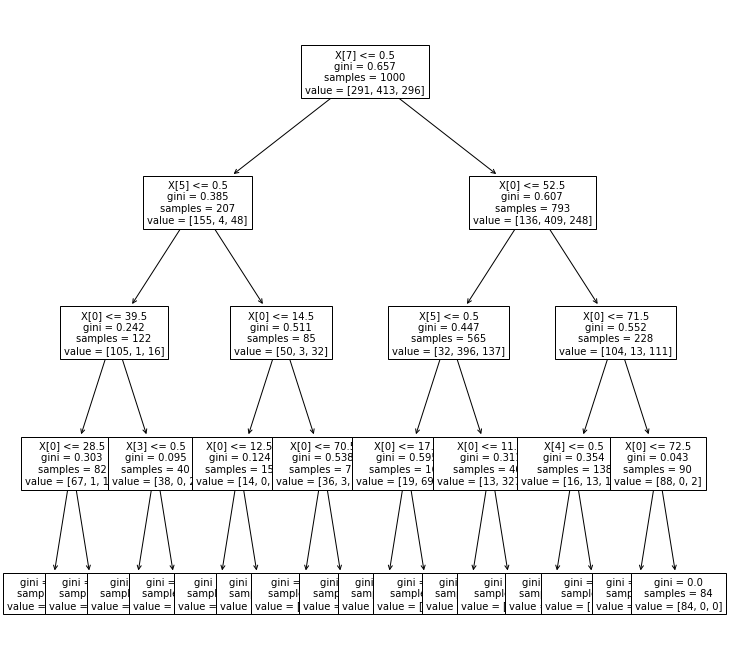

In [24]:
clf = DecisionTreeClassifier(max_depth=4)  # set hyperparameter
clf.fit(x, y)

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(clf, fontsize=10) 
plt.show()

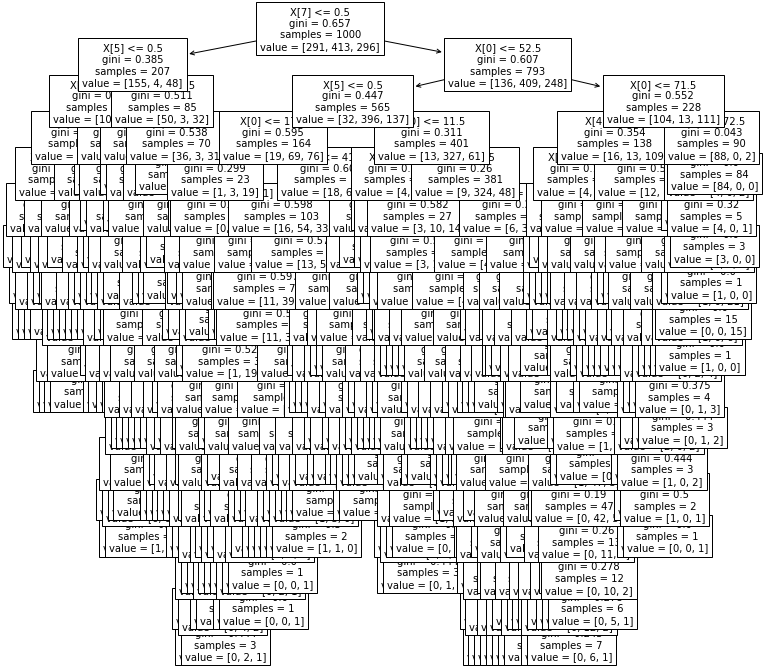

In [14]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(clf, fontsize=10)
# plt.savefig('tree_high_dpi', dpi=100)
plt.show()